In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the modeling data
data = pd.read_excel('/content/drive/My Drive/Gitlab/modelling_data.xlsx')

In [ ]:
data.head()

In [ ]:
data.columns

#Preparing the data for modeling

In [ ]:
#dropping some columns
data = data.drop(columns = ['Prevalence Rate', 'Gi_Star_Incidence', 'Gi_Star_Mortality',
       'Gi_Star'], axis = 1)

In [ ]:
data = data.rename(columns={"Incidence of malaria (per 1,000 population at risk)": "Incidence of malaria",
'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)' : 'Children under age 5 with fever receiving antimalarial drugs'})

#Feature selection
A way to select features is using feature importance. I will be using the permutation feature importance techniques over a variety of models such as RandomForest and Boosting methods.

Permutation feature importance is a technique used to evaluate the importance of each feature in a predictive model. It works by permuting the values of a single feature while keeping the other features unchanged, and then measuring the resulting decrease in model performance. The greater the decrease in performace, the more important the feature is considered.

Selected Features: ['Malaria cases reported', 'Children under age 5 with fever receiving antimalarial drugs', 'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)', 'Total Population', 'Rural Population', 'Rural population (% of total population)', 'Rural population growth (annual %)', 'Urban population (% of total population)', 'People using at least basic drinking water services (% of population)', 'People using at least basic drinking water services, rural (% of rural population)', 'People using at least basic drinking water services, urban (% of urban population)', 'Standardized Incidence Rate']


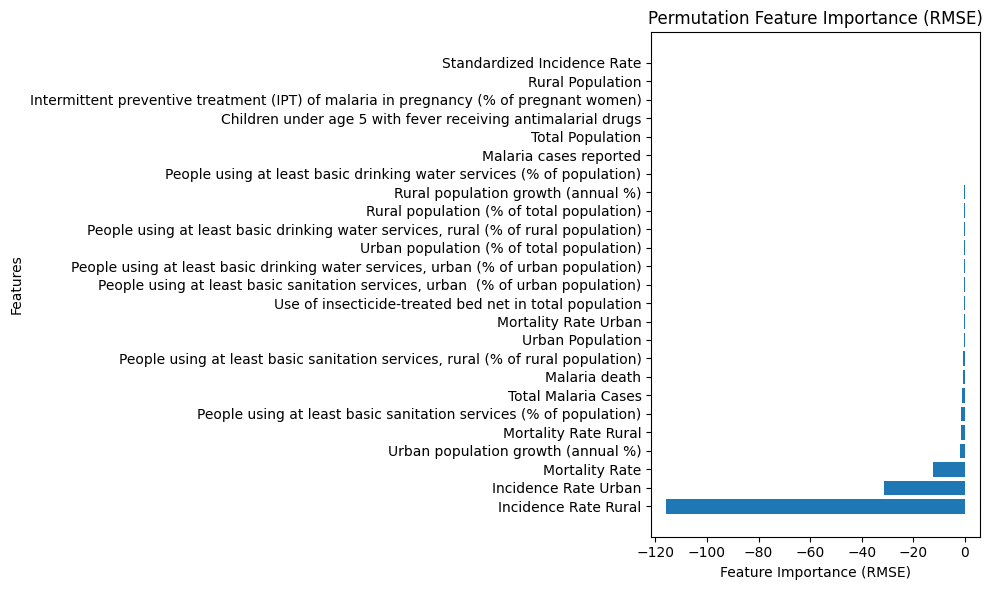

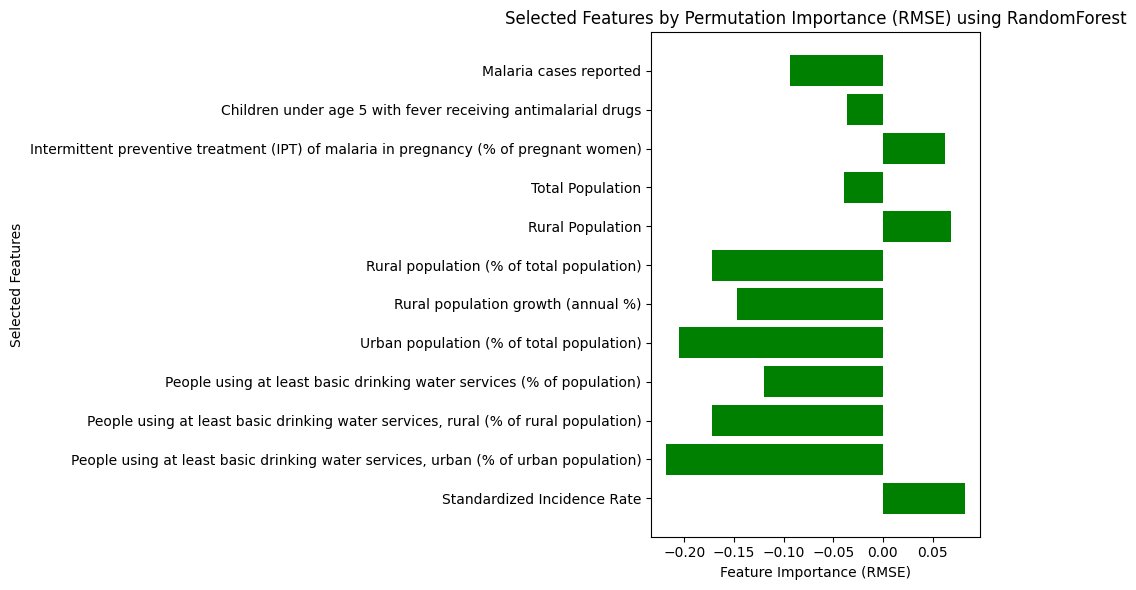

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

X = data.drop(columns=["Incidence of malaria", 'Country Name_left', 'Country Name_right', 'geometry', 'Year', 'index_right', 'latitude', 'longitude'], axis=1)
y = data['Incidence of malaria']

# Normalizing the data inputs
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Calculate permutation feature importances using RMSE
def calculate_rmse(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(mean_squared_error(y, y_pred))

result = permutation_importance(model, X_test, y_test, scoring=calculate_rmse, n_repeats=10, random_state=42)

# Get the feature importance scores
importance_scores = result.importances_mean

# Set a threshold (adjust as needed)
threshold = np.percentile(importance_scores, 50)

# Select features based on the threshold
selected_features = [feature for feature, importance in zip(X.columns, importance_scores) if importance > threshold]

print("Selected Features:", selected_features)

# Sort the list of feature importance tuples
feature_importance_list = list(zip(X.columns, importance_scores))
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

# Extract feature names and importance scores after sorting
sorted_feature_names, sorted_importance_scores = zip(*feature_importance_list)

# Create a vertical bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_importance_scores, align='center')
plt.xlabel("Feature Importance (RMSE)")
plt.ylabel("Features")
plt.title("Permutation Feature Importance (RMSE)")
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.gca().invert_yaxis()
plt.tight_layout()

# Create a horizontal bar chart of selected features in order of importance
selected_feature_indices = [sorted_feature_names.index(feature) for feature in selected_features]
selected_importance_scores = [sorted_importance_scores[i] for i in selected_feature_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_features)), selected_importance_scores, align='center', color='green')
plt.xlabel("Feature Importance (RMSE)")
plt.ylabel("Selected Features")
plt.title("Selected Features by Permutation Importance (RMSE) using RandomForest")
plt.yticks(range(len(selected_features)), selected_features)
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

Selected Features: ['Malaria cases reported', 'Use of insecticide-treated bed net in total population', 'Children under age 5 with fever receiving antimalarial drugs', 'Total Population', 'Rural Population', 'Urban population (% of total population)', 'People using at least basic drinking water services, rural (% of rural population)', 'People using at least basic drinking water services, urban (% of urban population)', 'People using at least basic sanitation services (% of population)', 'People using at least basic sanitation services, rural (% of rural population)', 'People using at least basic sanitation services, urban  (% of urban population)', 'Standardized Incidence Rate']


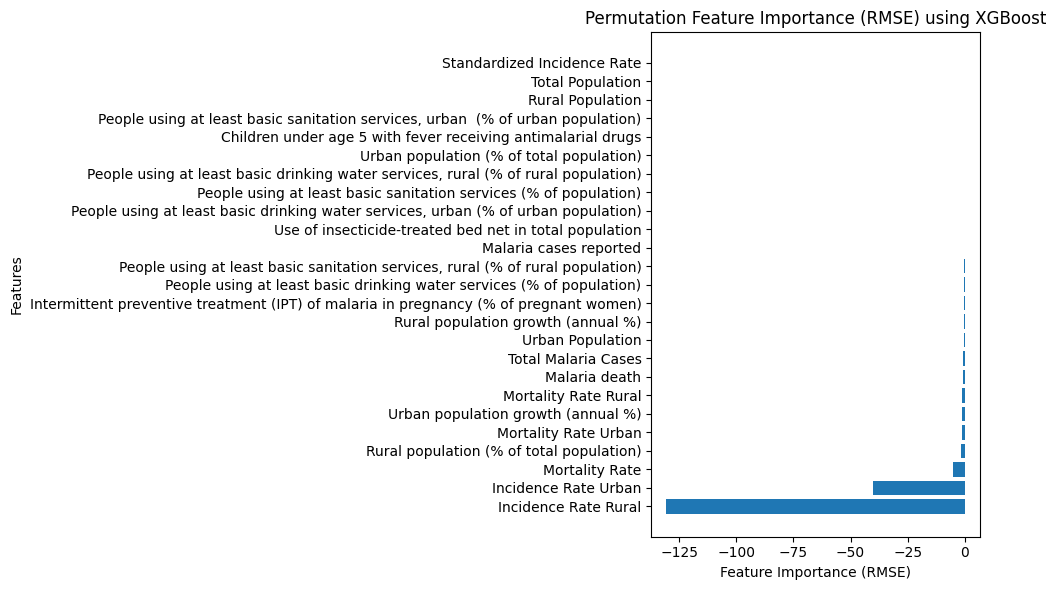

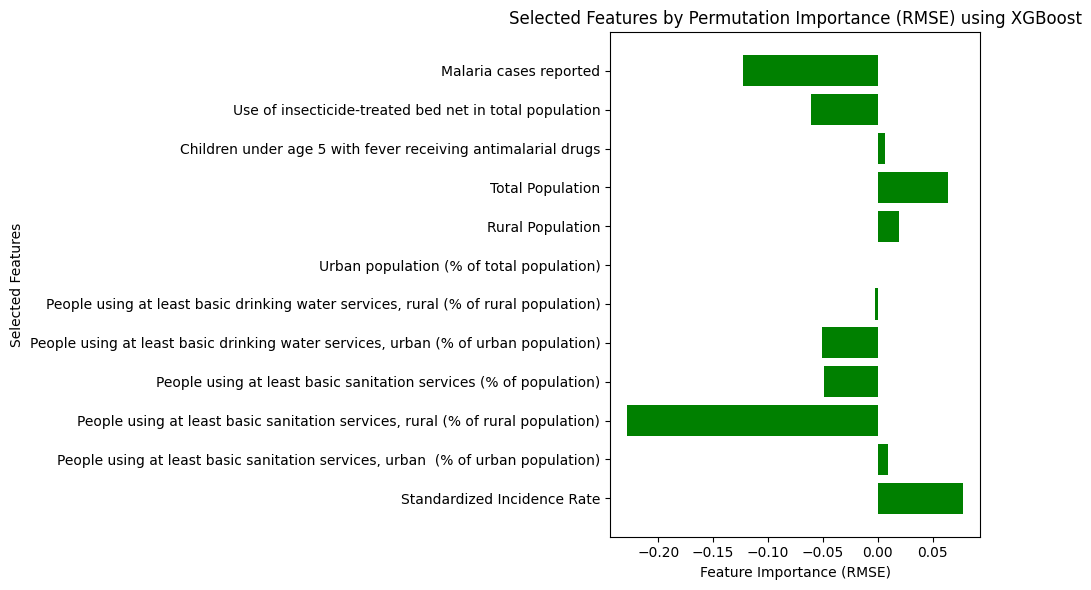

In [ ]:
#let us also check using a boosting method
import xgboost as xgb

X = data.drop(columns=["Incidence of malaria", 'Country Name_left', 'Country Name_right', 'geometry', 'Year', 'index_right', 'latitude', 'longitude'], axis=1)
y = data['Incidence of malaria']

# Normalizing the data inputs
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Fit the XGBoost model
model.fit(X_train, y_train)

# Calculate permutation feature importances using RMSE
def calculate_rmse(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(mean_squared_error(y, y_pred))

result = permutation_importance(model, X_test, y_test, scoring=calculate_rmse, n_repeats=10, random_state=42)

# Get the feature importance scores
importance_scores = result.importances_mean

# Set a threshold (adjust as needed)
threshold = np.percentile(importance_scores, 50)

# Select features based on the threshold
selected_features = [feature for feature, importance in zip(X.columns, importance_scores) if importance > threshold]

print("Selected Features:", selected_features)

# Sort the list of feature importance tuples
feature_importance_list = list(zip(X.columns, importance_scores))
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

# Extract feature names and importance scores after sorting
sorted_feature_names, sorted_importance_scores = zip(*feature_importance_list)

# Create a vertical bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_importance_scores, align='center')
plt.xlabel("Feature Importance (RMSE)")
plt.ylabel("Features")
plt.title("Permutation Feature Importance (RMSE) using XGBoost")
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.gca().invert_yaxis()
plt.tight_layout()

# Create a horizontal bar chart of selected features in order of importance
selected_feature_indices = [sorted_feature_names.index(feature) for feature in selected_features]
selected_importance_scores = [sorted_importance_scores[i] for i in selected_feature_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_features)), selected_importance_scores, align='center', color='green')
plt.xlabel("Feature Importance (RMSE)")
plt.ylabel("Selected Features")
plt.title("Selected Features by Permutation Importance (RMSE) using XGBoost")
plt.yticks(range(len(selected_features)), selected_features)
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

In [ ]:
data.columns

Index(['Country Name_left', 'geometry', 'index_right', 'Country Name_right',
       'Year', 'Incidence of malaria', 'Malaria cases reported',
       'Malaria death',
       'Use of insecticide-treated bed net in total population',
       'Children under age 5 with fever receiving antimalarial drugs',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Total Population', 'Rural Population', 'Urban Population',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic drinking water services, rural (% of rural population)',
       'People using at least basic drinking water services, urban (% of urban population)',
       'People using at least basic sanitation services (% of population)',
 

In [ ]:
#Now let us select our features based on what we have above
selected_features1  = data[['Malaria cases reported',
 'Total Population',
 'Rural Population',
 'Urban population (% of total population)',
 'People using at least basic drinking water services (% of population)',
 'People using at least basic drinking water services, rural (% of rural population)',
 'People using at least basic sanitation services (% of population)',
 'People using at least basic sanitation services, urban  (% of urban population)', 'Total Malaria Cases', 'Mortality Rate',
  'Incidence Rate Urban', 'Incidence Rate Rural', 'Mortality Rate Urban', 'Malaria death'
 ]]

selected_features2 = data[['Malaria cases reported', 'Malaria death', 'Total Malaria Cases', 'Mortality Rate',
'Total Population']]

len(selected_features3)

NameError: ignored

# Model Building

In [ ]:
pip install lime

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import lime
import lime.lime_tabular
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = selected_features2
#y = data['Incidence of malaria']
y = data['Standardized Incidence Rate']
# Normalizing the data inputs
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)

In [ ]:
#let us evaluate on the training set
y_train_pred = rf_model.predict(X_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

In [ ]:
#Let us train another model - XGBOOST
from xgboost import XGBRegressor

# Create an XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

In [ ]:
#let us evaluate on the training set
y_train_pred = xgb_model.predict(X_train)

# Calculate regression metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

In [ ]:
# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

# Stacking Regressor
As an improvement on the Team Flask Project, a RandomForest Regressor was used, in our project. We employed a stacking regressor to combine the randomforest and xgboost regressors used above

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define features (X) and target (y)
#X = selected_features1
#y = data['Incidence of malaria']

# Normalizing the data inputs
#scaler = MinMaxScaler()
#X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Define the base regressors
base_regressors = [
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgboost', XGBRegressor(n_estimators=100, random_state=42))


]

# Define the final regressor as RandomForestRegressor
meta_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_regressors, final_estimator=meta_regressor)

# Train the stacking regressor
stacking_regressor.fit(X_train, y_train)

In [ ]:
#let us evaluate the stacking regressor on the training set
y_train_pred = stacking_regressor.predict(X_train)

# Calculate regression metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

In [ ]:
# Make predictions
y_pred = stacking_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

# Voting Regressor

In [ ]:
#let us also use a voting regressor
from sklearn.ensemble import VotingRegressor


# Define the individual regressors
regressors = [
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    #('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('xgboost', XGBRegressor(n_estimators=100, random_state=42)),


]

# Create the voting regressor
voting_regressor = VotingRegressor(estimators=regressors)

# Train the voting regressor
voting_regressor.fit(X_train, y_train)

In [ ]:
#let us evaluate the voting regressor on the training set
y_train_pred = voting_regressor.predict(X_train)

# Calculate regression metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

In [ ]:
# Make predictions using the voting regressor
y_pred = voting_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

The stacking regressor is slightly better than the voting regressor

# Validation and Optimization of the stacking regressor

 # RandomForestRegressor - Cross Validation and Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 10 folds and scoring as negative mean squared error
neg_mse_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive mean squared error
mse_scores = -neg_mse_scores

# Calculate other evaluation metrics based on the mean squared error
mae_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(mse_scores)
r2_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='r2')

# Print the results
print(f"Mean Absolute Error (MAE) scores: {mae_scores}")
print(f"Mean Squared Error (MSE) scores: {mse_scores}")
print(f"Root Mean Squared Error (RMSE) scores: {rmse_scores}")
print(f"R-squared (R2) scores: {r2_scores}")

# Calculate the mean and standard deviation of the evaluation metrics
mean_mae = np.mean(-mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

std_mae = np.std(-mae_scores)
std_mse = np.std(mse_scores)
std_rmse = np.std(rmse_scores)
std_r2 = np.std(r2_scores)
print('---'*20)
print(f"Mean MAE: {mean_mae}, Std MAE: {std_mae}")
print(f"Mean MSE: {mean_mse}, Std MSE: {std_mse}")
print(f"Mean RMSE: {mean_rmse}, Std RMSE: {std_rmse}")
print(f"Mean R2: {mean_r2}, Std R2: {std_r2}")

HyperParameter Tuning for the RandomForest Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    # Create a Random Forest Regressor model
    rf_model = RandomForestRegressor(random_state=42)

    # Define the hyperparameter grid for RandomizedSearchCV
    param_dist = {
      'n_estimators': randint(50,100, 200),                  # Number of trees in the forest
      'max_depth': [None, 10, 20, 30],                   # Maximum depth of the trees
      'min_samples_split': randint(2, 10),              # Minimum number of samples required to split an internal node
      'min_samples_leaf': randint(1, 4),               # Minimum number of samples required to be at a leaf node
      'max_features': ['auto', 'sqrt'],                 # Number of features to consider when looking for the best split
      'bootstrap': [True, False]                         # Whether to use bootstrapping when building trees
  }

    # Create a RandomizedSearchCV object
    random_search = RandomizedSearchCV(
      rf_model, param_distributions=param_dist, n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=42
  )

    # Fit the randomized search to the data
    random_search.fit(X_train, y_train)

    # Get the best estimator from random search
    best_rf_regressor = random_search.best_estimator_
    best_rf_regressor

    # Evaluate the best Random Forest Regressor on the test set
    y_pred = best_rf_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2) Score: {r2}")

# XGBOOST - Cross Validation and Hyperparameter Tuning

In [ ]:
# Perform cross-validation with 10 folds and scoring as negative mean squared error
neg_mse_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive mean squared error
mse_scores = -neg_mse_scores

# Calculate other evaluation metrics based on the mean squared error
mae_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(mse_scores)
r2_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='r2')

# Print the results
print(f"Mean Absolute Error (MAE) scores: {mae_scores}")
print(f"Mean Squared Error (MSE) scores: {mse_scores}")
print(f"Root Mean Squared Error (RMSE) scores: {rmse_scores}")
print(f"R-squared (R2) scores: {r2_scores}")

# Calculate the mean and standard deviation of the evaluation metrics
mean_mae = np.mean(-mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

std_mae = np.std(-mae_scores)
std_mse = np.std(mse_scores)
std_rmse = np.std(rmse_scores)
std_r2 = np.std(r2_scores)
print('---'*20)
print(f"Mean MAE: {mean_mae}, Std MAE: {std_mae}")
print(f"Mean MSE: {mean_mse}, Std MSE: {std_mse}")
print(f"Mean RMSE: {mean_rmse}, Std RMSE: {std_rmse}")
print(f"Mean R2: {mean_r2}, Std R2: {std_r2}")

Hyperparameter tuning for XGBOOST

In [ ]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    # Create an XGBoost Regressor model
    xgb_model = XGBRegressor(random_state=42)

    # Define the hyperparameter grid for RandomizedSearchCV
    param_dist = {
        'n_estimators': randint(50, 200),           # Number of boosting rounds
        'max_depth': [3, 4, 5, 6],                 # Maximum depth of trees
        'learning_rate': [0.01, 0.1, 0.2, 0.3],   # Step size shrinkage used in boosting
        'min_child_weight': randint(1, 10),        # Minimum sum of instance weight (hessian) needed in a child
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],   # Fraction of samples used for fitting the trees
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
        'gamma': [0, 1, 2],                       # Minimum loss reduction required to make a further partition on a leaf node
    }

    # Create a RandomizedSearchCV object
    random_search = RandomizedSearchCV(
        xgb_model, param_distributions=param_dist, n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=42
    )

    # Fit the randomized search to the data
    random_search.fit(X_train, y_train)

    # Get the best estimator from random search
    best_xgb_regressor = random_search.best_estimator_

    # Evaluate the best XGBoost Regressor on the test set
    y_pred = best_xgb_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2) Score: {r2}")

# STACKED REGRESSOR - Cross Validation and Hyperparameter Tuning

In [ ]:
# Perform cross-validation with 10 folds and scoring as negative mean squared error
neg_mse_scores = cross_val_score(stacking_regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive mean squared error
mse_scores = -neg_mse_scores

# Calculate other evaluation metrics based on the mean squared error
mae_scores = cross_val_score(stacking_regressor, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(mse_scores)
r2_scores = cross_val_score(stacking_regressor, X_train, y_train, cv=10, scoring='r2')

# Print the results
print(f"Mean Absolute Error (MAE) scores: {mae_scores}")
print(f"Mean Squared Error (MSE) scores: {mse_scores}")
print(f"Root Mean Squared Error (RMSE) scores: {rmse_scores}")
print(f"R-squared (R2) scores: {r2_scores}")

# Calculate the mean and standard deviation of the evaluation metrics
mean_mae = np.mean(-mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

std_mae = np.std(-mae_scores)
std_mse = np.std(mse_scores)
std_rmse = np.std(rmse_scores)
std_r2 = np.std(r2_scores)
print('---'*20)
print(f"Mean MAE: {mean_mae}, Std MAE: {std_mae}")
print(f"Mean MSE: {mean_mse}, Std MSE: {std_mse}")
print(f"Mean RMSE: {mean_rmse}, Std RMSE: {std_rmse}")
print(f"Mean R2: {mean_r2}, Std R2: {std_r2}")

Hyperparameter Tuning for the stacked regressor

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import randint
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    # Define hyperparameter grid for stacking regressor
    param_dist = {
        'final_estimator__n_estimators': randint(50, 100, 200),
        'final_estimator__max_depth': [None, 10, 20, 30],
        'final_estimator__min_samples_split': randint(2, 10),
        'final_estimator__min_samples_leaf': randint(1, 4),
        'final_estimator__max_features': ['auto', 'sqrt'],
        'final_estimator__bootstrap': [True, True]
    }

    # Create a RandomizedSearchCV object
    random_search = RandomizedSearchCV(
        stacking_regressor, param_distributions=param_dist, n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=42
    )

    # Fit the randomized search to the data
    random_search.fit(X_train, y_train)

    # Get the best estimator from random search
    best_stacking_regressor = random_search.best_estimator_

    # Evaluate the best stacking regressor on the test set
    y_pred = best_stacking_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2) Score: {r2}")

# VOTING REGRESSOR - CROSS VALIDATION AND HYPERPARAMETER TUNING

In [ ]:
# Perform cross-validation with 10 folds and scoring as negative mean squared error
neg_mse_scores = cross_val_score(voting_regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive mean squared error
mse_scores = -neg_mse_scores

# Calculate other evaluation metrics based on the mean squared error
mae_scores = cross_val_score(voting_regressor, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(mse_scores)
r2_scores = cross_val_score(voting_regressor, X_train, y_train, cv=10, scoring='r2')

# Print the results
print(f"Mean Absolute Error (MAE) scores: {mae_scores}")
print(f"Mean Squared Error (MSE) scores: {mse_scores}")
print(f"Root Mean Squared Error (RMSE) scores: {rmse_scores}")
print(f"R-squared (R2) scores: {r2_scores}")

# Calculate the mean and standard deviation of the evaluation metrics
mean_mae = np.mean(-mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

std_mae = np.std(-mae_scores)
std_mse = np.std(mse_scores)
std_rmse = np.std(rmse_scores)
std_r2 = np.std(r2_scores)
print('---'*20)
print(f"Mean MAE: {mean_mae}, Std MAE: {std_mae}")
print(f"Mean MSE: {mean_mse}, Std MSE: {std_mse}")
print(f"Mean RMSE: {mean_rmse}, Std RMSE: {std_rmse}")
print(f"Mean R2: {mean_r2}, Std R2: {std_r2}")

Hyper parameter tuning

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    # Define the individual regressors
    regressors = [
        ('random_forest', RandomForestRegressor(random_state=42)),
        ('xgboost', XGBRegressor(random_state=42)),
    ]

    # Create the voting regressor
    voting_regressor = VotingRegressor(estimators=regressors)

    # Define the hyperparameter grid for RandomizedSearchCV
    param_dist = {
        'random_forest__n_estimators': randint(50,100, 200),                  # Number of trees in the Random Forest
        'random_forest__max_depth': [None, 10, 20, 30],                  # Maximum depth of Random Forest trees
        'random_forest__min_samples_split': randint(2, 10),              # Minimum samples required to split a node
        'random_forest__min_samples_leaf': randint(1, 4),               # Minimum samples required to be at a leaf node
        'random_forest__max_features': ['auto', 'sqrt'],                # Number of features to consider when looking for the best split
        'random_forest__bootstrap': [True, False],
        'xgboost__n_estimators': randint(50, 200),                       # Number of boosting rounds for XGBoost
        'xgboost__max_depth': [3, 4, 5, 6, 7],                          # Maximum depth of XGBoost trees
        'xgboost__learning_rate': [0.01, 0.1, 0.2, 0.3],                # Learning rate for XGBoost
        'xgboost__min_child_weight': randint(1,10),
        'xgboost__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'xgboost__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'xgboost__gamma': [0, 1, 2]
    }


    # Create a RandomizedSearchCV object
    random_search = RandomizedSearchCV(
        voting_regressor, param_distributions=param_dist, n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=42
    )

    # Fit the randomized search to the data
    random_search.fit(X_train, y_train)

    # Get the best estimator from random search
    best_voting_regressor = random_search.best_estimator_

    # Evaluate the best Voting Regressor on the test set
    y_pred = best_voting_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2) Score: {r2}")

In [ ]:
# Define a list of model names for labeling the box plots
model_names = ["RandomForest", "XGBOOST", "Stack Regressor", "Voting Regressor"]

# Create a list of the performance scores for each model
performance_scores = [0.991817235815373, 0.9759016452019804, 0.9761002640668013, 0.9880953933434533]

# Convert the scores to percentages
performance_percentages = [score * 100 for score in performance_scores]

# Create a bar plot to visualize the performance
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Adjust bar width and color palette
sns.barplot(x=model_names, y=performance_percentages, palette="viridis", saturation=0.7)

plt.xlabel("Models")
plt.ylabel("R-Squared (%)")
plt.title("Performance Comparison")
plt.xticks(rotation=45)

# Adding percentage labels on top of the bars
for i, percentage in enumerate(performance_percentages):
    plt.text(i, percentage, f"{percentage:.2f}%", ha='center', va='bottom', fontsize=12, weight='bold')

plt.show()

Random Forest regressor model performed better than all the models including the with an R-squared of 99%

In [ ]:

import pickle
from sklearn.metrics import mean_squared_error
from lime.lime_tabular import LimeTabularExplainer


# Define feature names
feature_names = selected_features2

# Initialize the LimeTabularExplainer with feature names
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode="regression", feature_names=feature_names)

# Choosing Individual data point for explanation
data_point_idx = 30
data_point = X_test[data_point_idx]
prediction = best_rf_regressor.predict([data_point])[0]

# Defining a classification threshold
low_threshold = 100
high_threshold = 300

# Function to classify incidence rates
def classify_incidence_rate(incidence_rate):
    if incidence_rate < low_threshold:
        return "Low"
    elif low_threshold <= incidence_rate <= high_threshold:
        return "medium"
    else:
        return "High"

# Explain the prediction for the selected data point
explanation = explainer.explain_instance(data_point, best_rf_regressor.predict)

# Show LIME explanation
explanation.show_in_notebook()

# Classify the incidence rate for the data point
predicted_incidence_category = classify_incidence_rate(prediction)
print(f"Predicted Incidence Category: {predicted_incidence_category}")

Predicted Incidence Category: Low


# INTERPRETABILITY OF THE BEST MODEL USING LIME

In [ ]:
import lime
import lime.lime_tabular

# Define feature names
feature_names = selected_features2

# Initialize the LimeTabularExplainer with feature names
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode="regression", feature_names=feature_names)

# Choosing Individual data point for explanation
data_point_idx = 50
data_point = X_test[data_point_idx]
prediction = best_rf_regressor.predict([data_point])[0]

# Defining a classification threshold
low_threshold = 100
high_threshold = 300

# Function to classify incidence rates
def classify_incidence_rate(incidence_rate):
    if incidence_rate < low_threshold:
        return "Low"
    elif low_threshold <= incidence_rate <= high_threshold:
        return "medium"
    else:
        return "High"

# Function to classify incidence rates as high or low
#def classify_incidence_rate(incidence_rate):
 #   if incidence_rate >= high_threshold:
  #      return "High"
  #  else:
   #     return "Low"

# Explain the prediction for the selected data point
explanation = explainer.explain_instance(data_point, best_rf_regressor.predict)

# Show LIME explanation
explanation.show_in_notebook()

# Classify the incidence rate for the data point
predicted_incidence_category = classify_incidence_rate(prediction)
print(f"Predicted Incidence Category: {predicted_incidence_category}")

Predicted Incidence Category: medium


In [ ]:
explanation.as_list()

[('Malaria cases reported > 0.04', 528.099668950068),
 ('Total Malaria Cases > -0.03', -65.01133854097655),
 ('-0.26 < Total Population <= 0.17', -58.97180174927181),
 ('Malaria death > 0.01', -25.989141913742824),
 ('Mortality Rate > 0.50', -7.74882682329413)]

In [ ]:
import lime
import lime.lime_tabular

# Define feature names
feature_names = selected_features2

# Initialize the LimeTabularExplainer with feature names
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode="regression", feature_names=feature_names)

# Choosing Individual data point for explanation
data_point_idx = 65
data_point = X_test[data_point_idx]
prediction = best_rf_regressor.predict([data_point])[0]

# Defining a classification threshold
low_threshold = 100
high_threshold = 300

# Function to classify incidence rates
def classify_incidence_rate(incidence_rate):
    if incidence_rate < low_threshold:
        return "Low"
    elif low_threshold <= incidence_rate <= high_threshold:
        return "medium"
    else:
        return "High"

# Function to classify incidence rates as high or low
#def classify_incidence_rate(incidence_rate):
#   if incidence_rate >= high_threshold:
  #      return "High"
  #  else:
   #     return "Low"

# Explain the prediction for the selected data point
explanation = explainer.explain_instance(data_point, best_rf_regressor.predict)

# Show LIME explanation
explanation.show_in_notebook()

# Classify the incidence rate for the data point
predicted_incidence_category = classify_incidence_rate(prediction)
print(f"Predicted Incidence Category: {predicted_incidence_category}")

Predicted Incidence Category: High


# Preparing the model for deployment

In [90]:

# Define the components to save
model_components = {
    "best_rf_regressor": best_rf_regressor,
    "low_threshold": low_threshold,
    "high_threshold": high_threshold,
    'X_train': X_train,
    'feature_names': feature_names
}

# Generate lime explanation
explanation = explainer.explain_instance(data_point, best_rf_regressor.predict)

#extracting feature importance and contributions
explanation_text = 'LIME Explanation:\n'
explanation_text += f'Predicted Category: {[predicted_incidence_category]}'
explanation_text += 'Feature Contributions:\n'
for feature, score in explanation.as_list():
  explanation_text += f'{feature}: {score}\n'

#adding lime explanation to components
model_components["lime_explanation"] = explanation_text

# Defining the filename for the pickle file
pickle_filename = "model_components.pkl"

# Save the model components to the pickle file
with open(pickle_filename, "wb") as pickle_file:
    pickle.dump(model_components, pickle_file)

print(f"Model components saved to {pickle_filename}")

Model components saved to model_components.pkl


In [79]:
X_train

array([[ 0.01100479, -0.27523896, -0.27656497, -0.45641012, -0.26364681],
       [-0.1844827 ,  0.02385327,  0.03980072,  1.02290991, -0.25528472],
       [-0.51523716, -0.27218145, -0.30108211, -0.44161119, -0.26304341],
       ...,
       [-0.27080558, -0.2317544 , -0.31343248, -0.39362682, -0.14633888],
       [ 0.37850175, -0.2435428 , -0.18749567, -0.03136873, -0.38072855],
       [-0.47555939,  0.53007469,  0.54108709,  1.32789784,  0.14489108]])

In [77]:

from google.colab import files

uploaded = files.upload()

Saving model_components (1).pkl to model_components (1) (2).pkl


In [86]:

import pickle
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

pickle_filename = "model_components (1) (2).pkl"

# Load the model components from the pickle file
with open(pickle_filename, "rb") as pickle_file:
    model_components = pickle.load(pickle_file)

#extracting the model components
model = model_components["best_rf_regressor"]
lime_explainer = LimeTabularExplainer(
    model_components["X_train"],
    mode = 'regression',
    feature_names = model_components["feature_names"]
)
def predict_with_lime_explanation(input_features):
  prediction = model.predict([input_features])[0]

  #I am generating the lime explanation here
  explanation = lime_explainer.explain_instance(
      input_features,
      model.predict,
      num_features = len(model_components["feature_names"])
  )
  #Extracting feature importance and contributions
  explanation_text = 'LIME Explanation:\n'
  for feature, score in explanation.as_list():
    explanation_text += f"f{feature}: {score}\n"

  low_threshold = 100
  high_threshold = 300

  # Function to classify incidence rates
  if prediction < low_threshold:
        incidence_category = 'Low'
  elif prediction <= high_threshold:
        incidence_category = 'Medium'
  else:
        incidence_category = 'High'

  #Return
  return {
      'Prediction': prediction,
      'Incidence_Category': incidence_category,
      'Explanation': explanation_text
  }


In [89]:
input_features = np.array([300, 50000, 800, 100, 200])

result = predict_with_lime_explanation(input_features)

# Display
print('Prediction:', result['Prediction'])
print('Incidence Category:', result['Incidence_Category'])
print(result['Explanation'])





Prediction: 156.34847363380064
Incidence Category: Medium
LIME Explanation:
fMalaria cases reported > 0.04: 513.277610025716
fTotal Population > 0.17: -109.29280609646878
fTotal Malaria Cases > -0.03: -64.89694081523848
fMalaria death > 0.01: -20.354663964220123
fMortality Rate > 0.50: -6.09602666599356

